In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import transpile

# 1º: Create the Circuit

While it is possible to manipulate quantum states directly with operators and state vectors in Qiskit, through the Operator and Statevector classes, this is not, in general, the most common way to work with Qiskit or with quantum programming.

Instead, we use the construction of quantum circuits, where qubits are manipulated through logic gates, quantum registers store quantum states, and classical registers store measurement results.

This circuit-based approach is quite versatile and allows us to create code snippets, protocols, and algorithms in a more clear, modular way that is compatible with real physical devices.

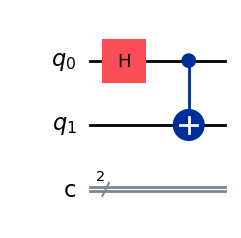

In [ ]:
# Creation of Quantum Registers, Classical Registers and Quantum Circuits
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

# Application of Quantum Gates
qc.h(0)
qc.cx(0, 1)

# Circuit View
qc.draw('mpl')

In [5]:
#  Visualização Matemática do Estado Quântico
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

# 2º:  Code Execution in the Noisy Simulator

After assembling the circuit, we must simulate it to obtain the behavior of the quantum state. As shown in the output above, if we run this quantum circuit repeatedly, we should obtain ket 00 50% of the time and ket 11 50% of the time. This time, we will use a noisy simulator. A noisy simulator attributes errors to the quantum gates that deviate the qubits and can generate results that are not predicted by mathematical theory. In theory, we should obtain the circuit results as ket 00 and ket 11. We will see that this is not true in a noisy simulator.

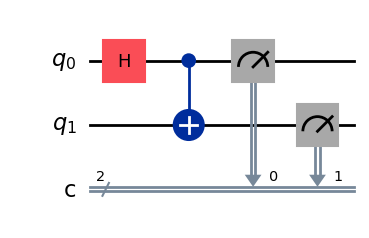

In [ ]:
# Measuring qubits in classical registers

qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')

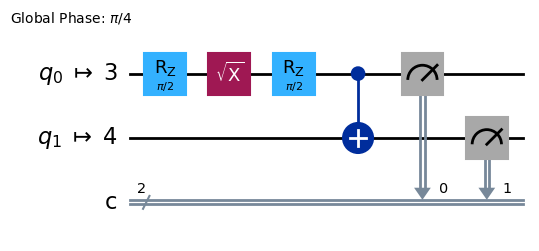

In [ ]:
# Selecting the Simulator
simulator = FakeManilaV2()

# Transpiling to gates worked in the simulator
trp_qc = transpile(backend=simulator, circuits=qc)
trp_qc.draw('mpl')

In [ ]:
# Running the transpiled circuit 1024 times in the simulator
run = simulator.run(trp_qc, shots=1024)

# Reaping the results
results = run.result()

# Collecting the count of the obtained states
counts = results.get_counts()
counts

{'00': 522, '11': 463, '10': 15, '01': 24}

# 3º: Visualizing Results

The final step is visualizing and analyzing the results. This is where we compare the mathematical predictions with the results obtained experimentally or through simulation. Naturally, the results don't always match the theoretical predictions exactly. The analysis can reveal hardware-specific effects, such as noise, read errors, or imperfections in the quantum gates, as well as limitations of the simulators themselves. As explained previously, the code snippet below demonstrates the result of our noisy simulation experiment.

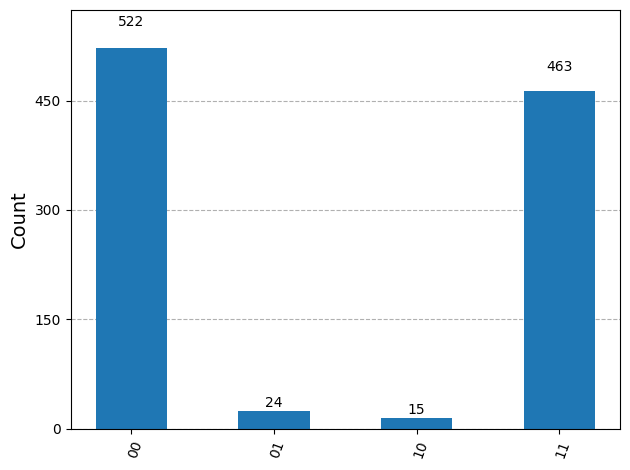

In [14]:
plot_histogram(counts)